# SAMPLE SGD CLASSIFIER CODE

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('D:/Documents/Data/Mall_Customers.csv')
y = dataset[['Gender']]
X = dataset[['Annual Income (k$)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    8.4s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    8.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished


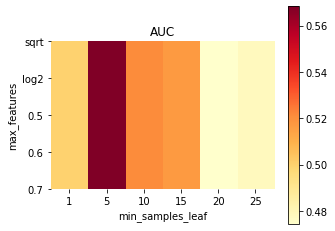

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False) 0.5683333333333334


In [23]:
from parfit import bestFit # Necessary if you wish to use bestFit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score

# Necessary if you wish to run each step sequentially
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

grid = {
    'min_samples_leaf': [1, 5, 10, 15, 20, 25],
    'max_features': ['sqrt', 'log2', 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
}
paramGrid = ParameterGrid(grid)

best_model, best_score, all_models, all_scores = bestFit(RandomForestClassifier(), paramGrid,
                                                    X_train, y_train, X_test, y_test, # nfolds=5 [optional, instead of validation set]
                                                    metric=roc_auc_score, greater_is_better=True, 
                                                    scoreLabel='AUC')

print(best_model, best_score)

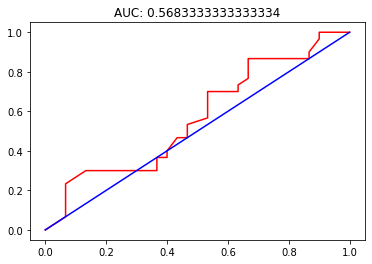

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_auc(actual, preds):
    fpr, tpr, thresholds = roc_curve(actual, preds[:,1])
    plt.plot(fpr, tpr,'r')
    plt.plot([0,1],[0,1],'b')
    plt.title('AUC: {}'.format(auc(fpr,tpr)))
    plt.show()
    
plot_roc_auc(y_test, best_model.predict_proba(X_test))